In [156]:
# Code to compute the weighted means of burst intervals as well as redshifts

import numpy as np
import pandas as pd
from astropy.io import ascii
from scipy.optimize import curve_fit
from matplotlib.pylab import plt
#data=ascii.read('grb2.txt')
data=pd.read_excel('grb2.xlsx',sheet_name='Sheet1')   #Input data will be grb2.xlsx for those GRBs who have T90_raw>2 seconds
                                                      #and to_process_in_python.xlsx for all sampled GRBs (comprehensive analyis)


In [157]:
data

,GRB Name,Obs_ID,z,1+z,T90_raw(s),T90_raw_error,T50_raw(s),T50_raw_error,E1_obsframe(KeV),E2_obsframe(KeV),T90_(s),T90_error,T50_(s),T50_error
0,180728A,850471,0.117,1.1170,8.688,0.321,2.464,0.035,125.330000,313.339302,5.280,2.197,1.824,0.230
1,60614,214805,0.127,1.1270,109.264,3.415,43.296,0.790,124.223602,310.559006,18.320,4.113,11.344,6.051
2,150727A,650530,0.313,1.3130,86.128,12.748,30.192,3.624,106.626047,266.565118,23.904,4.388,14.976,6.150
3,130427A,554620,0.34,1.3400,316.272,7.630,32.064,1.296,104.477612,261.194030,128.336,4.859,4.016,0.079
4,61021,234905,0.3463,1.3463,46.448,5.200,10.240,1.125,103.988710,259.971774,4.928,0.861,2.128,0.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,60927,231362,5.6,6.6000,22.528,1.277,15.792,5.217,21.212121,53.030303,21.248,1.395,16.320,5.891
235,130606A,557589,5.913,6.9130,163.088,2.983,71.696,5.921,20.251700,50.629249,163.344,2.805,77.296,64.377
236,50904,153514,6.2,7.2000,179.500,10.300,85.400,7.600,19.444444,48.611111,187.744,14.269,87.216,8.845
237,140515A,599037,6.32,7.3200,23.456,2.048,9.776,5.341,19.125683,47.814208,23.136,1.958,10.048,5.955


In [158]:
#data=data[:28]
#data

In [159]:
data.drop(["GRB Name"],axis=1,inplace=True)
data.drop(["Obs_ID"],axis=1,inplace=True)

In [160]:
data = data.astype(float)

In [161]:
data

,z,1+z,T90_raw(s),T90_raw_error,T50_raw(s),T50_raw_error,E1_obsframe(KeV),E2_obsframe(KeV),T90_(s),T90_error,T50_(s),T50_error
0,0.1170,1.1170,8.688,0.321,2.464,0.035,125.330000,313.339302,5.280,2.197,1.824,0.230
1,0.1270,1.1270,109.264,3.415,43.296,0.790,124.223602,310.559006,18.320,4.113,11.344,6.051
2,0.3130,1.3130,86.128,12.748,30.192,3.624,106.626047,266.565118,23.904,4.388,14.976,6.150
3,0.3400,1.3400,316.272,7.630,32.064,1.296,104.477612,261.194030,128.336,4.859,4.016,0.079
4,0.3463,1.3463,46.448,5.200,10.240,1.125,103.988710,259.971774,4.928,0.861,2.128,0.714
...,...,...,...,...,...,...,...,...,...,...,...,...
234,5.6000,6.6000,22.528,1.277,15.792,5.217,21.212121,53.030303,21.248,1.395,16.320,5.891
235,5.9130,6.9130,163.088,2.983,71.696,5.921,20.251700,50.629249,163.344,2.805,77.296,64.377
236,6.2000,7.2000,179.500,10.300,85.400,7.600,19.444444,48.611111,187.744,14.269,87.216,8.845
237,6.3200,7.3200,23.456,2.048,9.776,5.341,19.125683,47.814208,23.136,1.958,10.048,5.955


[0.04491747 0.10715844 0.33881239 0.50349563 1.05018123 2.808     ] [0.02511504 0.06223369 0.10396419 0.33117945 3.77862324 0.581     ]
[0.117      1.43916667 2.76133333 4.0835     5.40566667 6.72783333
 8.05      ]


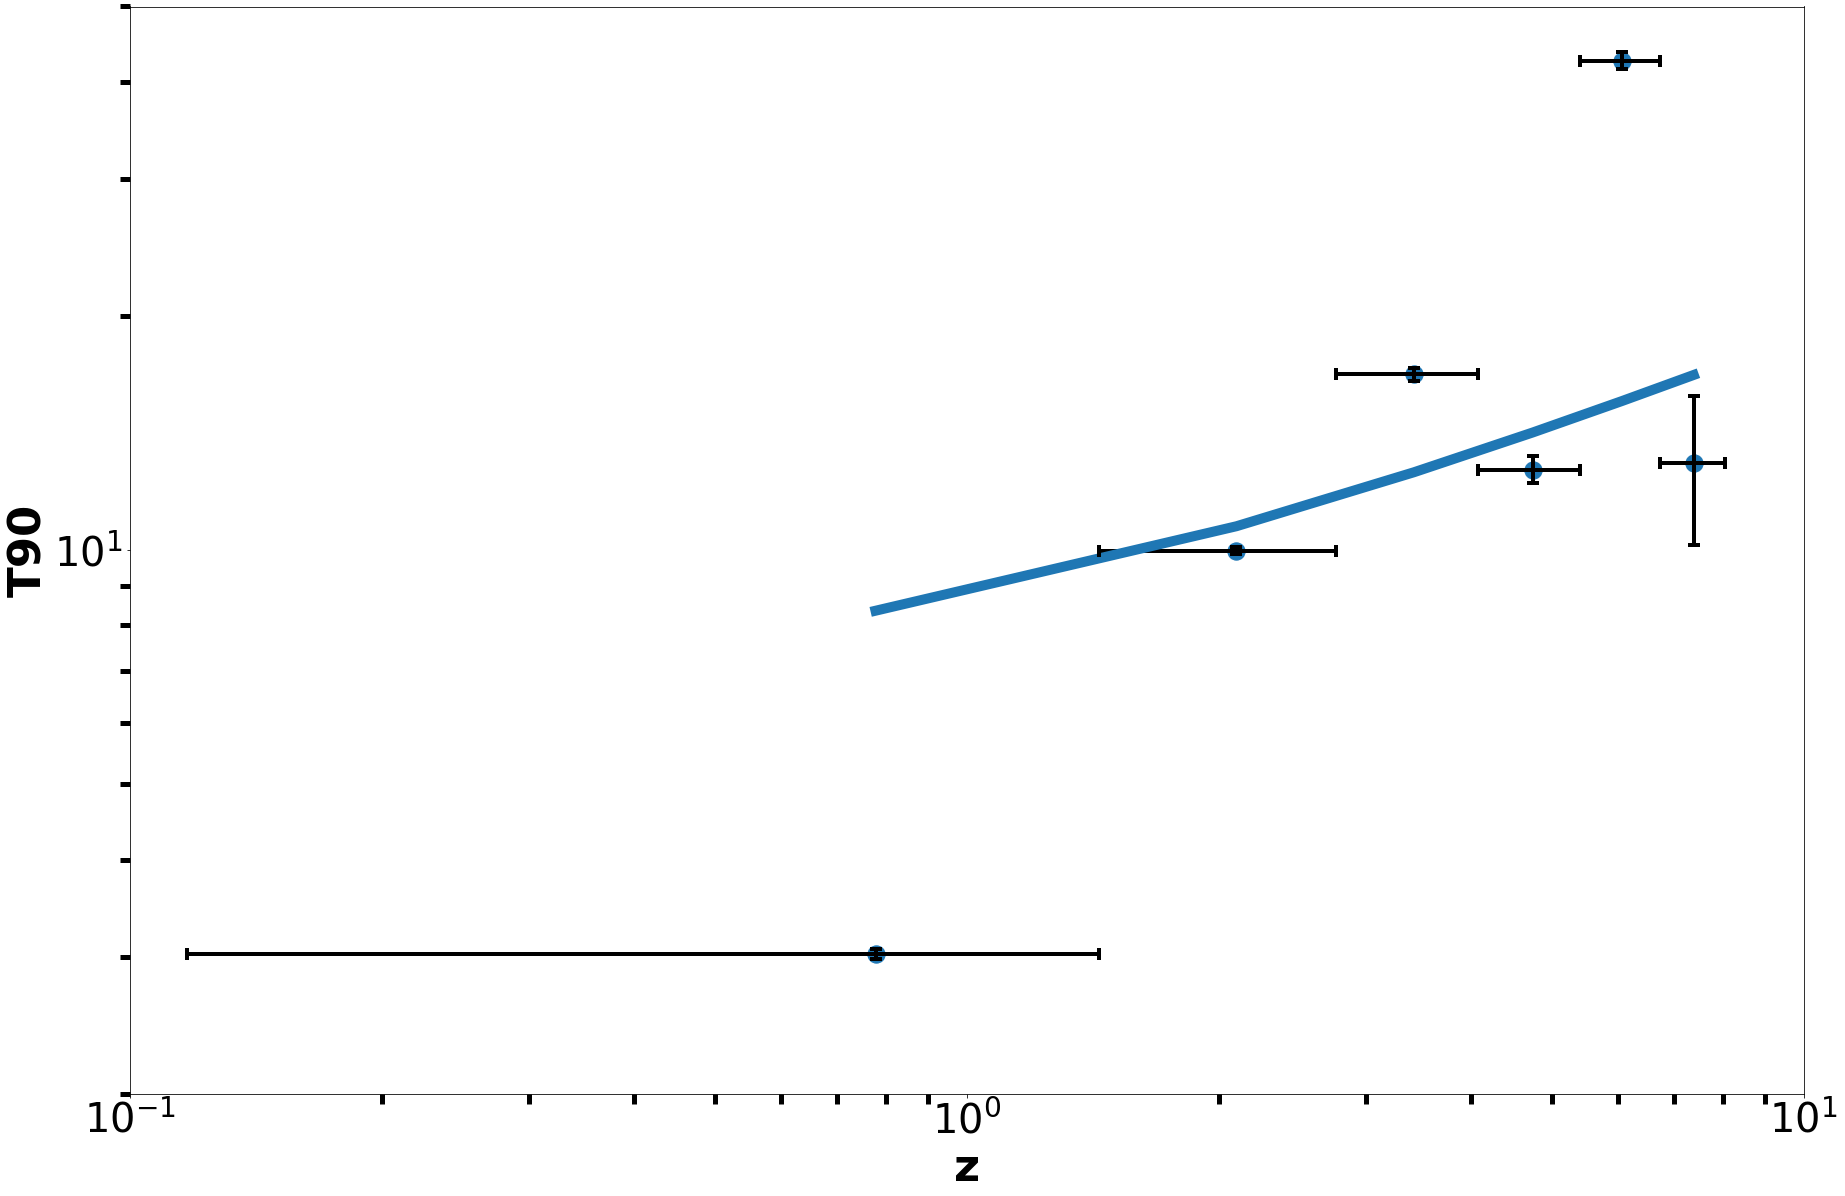

In [170]:
#Some Matplotlib settings
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
plt.rc('axes', labelsize='45')
plt.xticks(fontsize='40')
plt.yticks(fontsize='40')
rcParams['xtick.minor.size'] = 10
rcParams['xtick.minor.width'] = 5
rcParams['ytick.minor.size'] = 10
rcParams['ytick.labelsize'] = 30
rcParams['ytick.minor.width'] = 5

#Assigning the variables their correct values for easier analysis

z=(data['z'])  # variable z is really 1+z
t90=(data['T90_(s)'])
t50=(data['T50_(s)'])

t90err= (data['T90_error'])
t50err= (data['T50_error'])

wtt90=t90/(t90err**2)
wtt50=t50/(t50err**2)

err90=1/(t90err**2)
err50=1/(t50err**2)
n,bin_edges=np.histogram(z,bins=6)
x_mid = 0.5 * (bin_edges[1:] + bin_edges[:-1])  
xbin=0.5*(bin_edges[1]-bin_edges[0])
digitized_array = np.digitize(z, bins = bin_edges)


y90=np.array([np.sum(wtt90[digitized_array == i])   for i in set(digitized_array)])
yerr90=np.array([np.sum(err90[digitized_array == i])   for i in set(digitized_array)])

y50=np.array([np.sum(wtt50[digitized_array == i])   for i in set(digitized_array)])
yerr50=np.array([np.sum(err50[digitized_array == i])   for i in set(digitized_array)])

wtmean90=y90/yerr90
wtmean50=y50/yerr50

errwtmean90=np.sqrt(1.0/yerr90)
errwtmean50=np.sqrt(1.0/yerr50)

print (errwtmean90,errwtmean50)


#Parameters for best fit for those GRBs who have T90_raw>2 seconds
A_t90=6.45
B_t90=0.45
A_t50=4.32
B_t50=0.31

#Parameters for best fit for full grbs (comprehensive analysis)
#A_t90=0.93
#B_t90=1.59
#A_t50=1.58
#B_t50=1.03


#Curve for best fit

y_t90=(A_t90)*(1+x_mid)**(B_t90)

#Plotting the scatter points and error bars
plt.plot(x_mid,y_t90,linewidth=10)
plt.yscale('log')
plt.xscale('log')
plt.errorbar(x_mid,wtmean90,yerr=errwtmean90,xerr=xbin,fmt='.k',elinewidth=4,capsize=6,capthick=4)
plt.scatter(x_mid, wtmean90, s = 300)






print (bin_edges)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('z',fontweight='bold')
plt.ylabel('T90',fontweight='bold')

plt.ylim([2,50])
plt.xlim([0.1,10])
plt.savefig('T90_vs_z_WM_with_log_T90_raw_gt_2s.pdf')

[0.117      1.43916667 2.76133333 4.0835     5.40566667 6.72783333
 8.05      ]


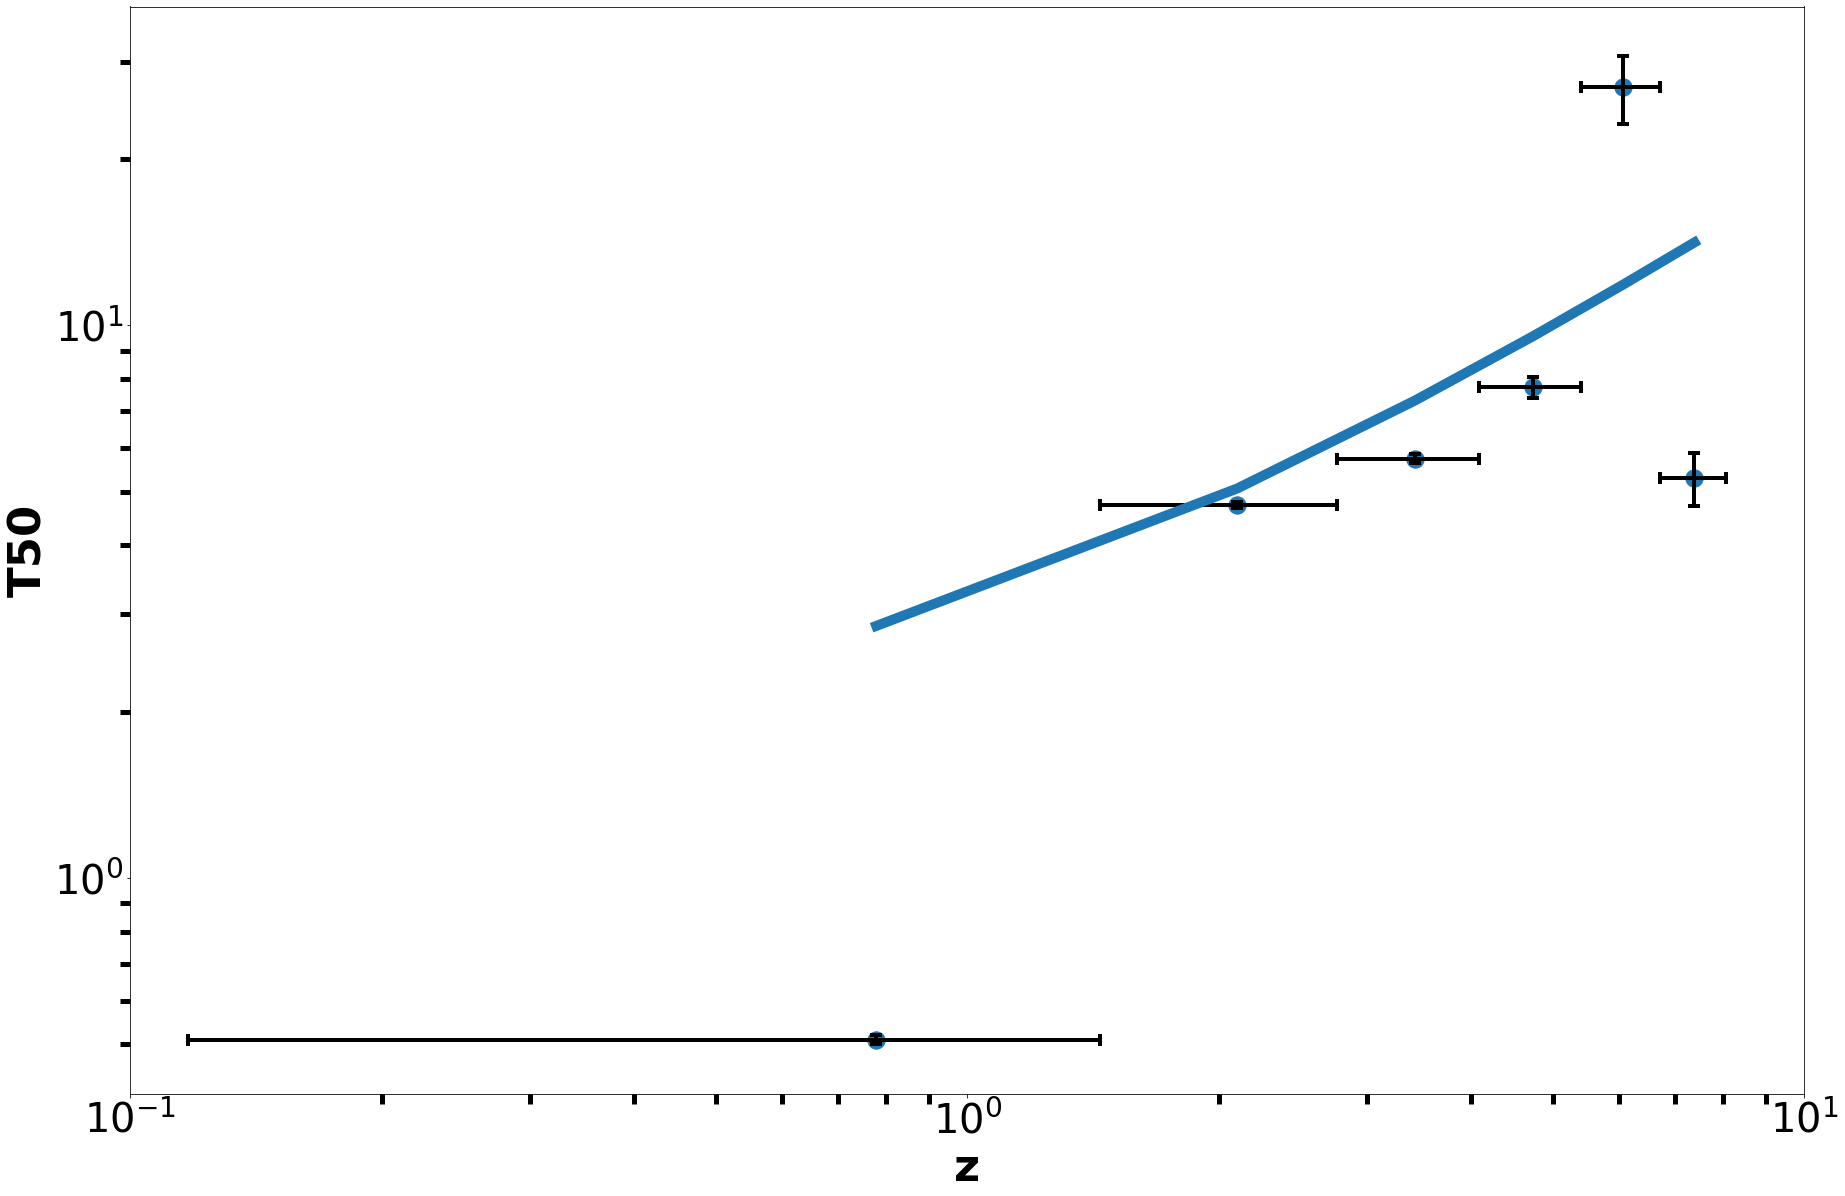

In [149]:
#Plotting weighted means for T50
#Some Matplotlib settings
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
plt.rc('axes', labelsize='45')
plt.xticks(fontsize='40')
plt.yticks(fontsize='40')
rcParams['xtick.minor.size'] = 10
rcParams['xtick.minor.width'] = 4
rcParams['ytick.minor.size'] = 10
rcParams['ytick.labelsize'] = 30
rcParams['ytick.minor.width'] = 4

y_t50=(A_t50)*(1+x_mid)**(B_t50)
plt.plot(x_mid,y_t50,linewidth=10)


plt.errorbar(x_mid,wtmean50,yerr=errwtmean50,xerr=xbin,fmt='.k',elinewidth=4,capsize=6,capthick=4)
plt.scatter(x_mid, wtmean50, s = 300)

print (bin_edges)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('z',fontweight='bold')
plt.ylabel('T50',fontweight='bold')
#plt.ylim([1,40])
plt.xlim([0.1,10])
plt.savefig('binnedgrb50.pdf')

In [132]:
wtmean90,errwtmean90,wtmean50,errwtmean50,bin_edges,x_mid

(array([ 0.4623549 ,  6.4052634 , 16.82631344, 12.69309053, 42.61095364,
        12.96      ]),
 array([0.01504779, 0.08440543, 0.33881239, 0.50349563, 1.05018123,
        2.808     ]),
 array([ 0.51010448,  4.73130254,  5.73530346,  7.72299699, 26.94356672,
         5.296     ]),
 array([0.00986121, 0.05562151, 0.10396419, 0.33117945, 3.77862324,
        0.581     ]),
 array([0.117     , 1.43916667, 2.76133333, 4.0835    , 5.40566667,
        6.72783333, 8.05      ]),
 array([0.77808333, 2.10025   , 3.42241667, 4.74458333, 6.06675   ,
        7.38891667]))

In [133]:

z_err=x_mid-bin_edges[0:6]
z_err

array([0.66108333, 0.66108333, 0.66108333, 0.66108333, 0.66108333,
       0.66108333])